In [1]:
# import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# get all the csv from the path
path = "../data/all_qt/"

all_files = os.listdir(path)
print(all_files)
all_files = [f for f in all_files if f.endswith('.csv')]
all_files = [os.path.join(path, f) for f in all_files]
# create a list of dataframes
dfs = []

# loop through the files and read them into a dataframe
for file in all_files:
    # read the csv file
    df = pd.read_csv(file)
    # append the dataframe to the list
    dfs.append(df)

['.DS_Store', 'myeloma_IMC_quantification.csv', 'cHL_CODEX_quantification.csv', 'healthy_bone_marrow_quantification.csv', 'breast_fibro_IMC_quantification.csv', 'cHL_2_MIBI_quantification.csv', 'cHL_1_MIBI_quantification.csv', 'IMMUcan_quantification.csv', 'feto_maternal_quantification.csv']


In [28]:
all_files

['../data/all_qt/myeloma_IMC_quantification.csv',
 '../data/all_qt/cHL_CODEX_quantification.csv',
 '../data/all_qt/healthy_bone_marrow_quantification.csv',
 '../data/all_qt/breast_fibro_IMC_quantification.csv',
 '../data/all_qt/cHL_2_MIBI_quantification.csv',
 '../data/all_qt/cHL_1_MIBI_quantification.csv',
 '../data/all_qt/IMMUcan_quantification.csv',
 '../data/all_qt/feto_maternal_quantification.csv']

In [14]:
dfs[0]["cell_type"]

0         Macrophage
1        Plasma_cell
2        Plasma_cell
3        Plasma_cell
4         Neutrophil
            ...     
76382      undefined
76383    CD8+_T_cell
76384    Plasma_cell
76385      undefined
76386    Plasma_cell
Name: cell_type, Length: 76387, dtype: object

In [ ]:
# list all the cell types over all the datframes
cell_types = []

for df in dfs:
    # get the cell types
    cell_types += df["cell_type"].unique().tolist()
# remove duplicates
cell_types = list(set(cell_types))
# remove the empty string
cell_types = [x for x in cell_types if x != ""]



In [17]:
cell_types

['NK3',
 'Intermediate Myeloid',
 'Monocyte',
 'NK4',
 'IDO_CAF',
 'M2c_Macrophage',
 'CD4+_T_cell',
 'Glandular',
 'IDO_CD4',
 'B_cell',
 'NK_cell',
 'Mature Myeloid',
 'SEC',
 'GATA1pos_Mks',
 'ki67_CD8',
 'M2a_Macrophage',
 'HLADR',
 'Artifact',
 'Dendritic_cell',
 'GATA1neg_Mks',
 'VSMC',
 'M1a_Macrophage',
 'Osteoblast',
 'Epithelial',
 'M2b_Macrophage',
 'Adipocyte',
 'FN_Cdh11_mCAF',
 'NK2',
 'Osteocyte',
 'EVT1b',
 'Early Myeloid Progenitor',
 'CD8+_T_cell',
 'EVT1a',
 'Vimentin high',
 'CD10_CAF',
 'ki67_CD4',
 'Macrophage',
 'Erythroblast',
 'Adipo-MSC',
 'Endothelial',
 'hypoxic Cancer',
 'CD44+ Undetermined',
 'CLP',
 'Non-classical_Monocyte',
 'Plasmacytoid_dendritic_cell',
 'muscle',
 'THY1+ MSC',
 'NK_T_cell',
 'CD4_CXCL13',
 'Cytotoxic_CD4+_T_cell',
 'Myeloid',
 'CCL21_CAF',
 'Blood',
 'Cancer',
 'CD73_CAF',
 'EVT2',
 'IDO_CD8',
 'Osteoclast',
 'GMP/Myeloblast',
 'Stroma',
 'BnT',
 'hypoxia',
 'Treg',
 'CD34_CAF',
 'M2_Macrophage',
 'CA9_CD10_CAF',
 'Neutrophil',
 'CD8_

In [ ]:
# remap cell type names in each dataframe 
cell_types_df["cell_type"] = cell_types_df["cell_type"].replace(
    {
        "BnT": "B_and_T_cell",
        "B_cells": "B_cell",
        "GMP": "GMP/Myeloblast",
        "HSC": "HSCs",
        "unedfined": "undefined"
    }
)

## cell type composition per datset

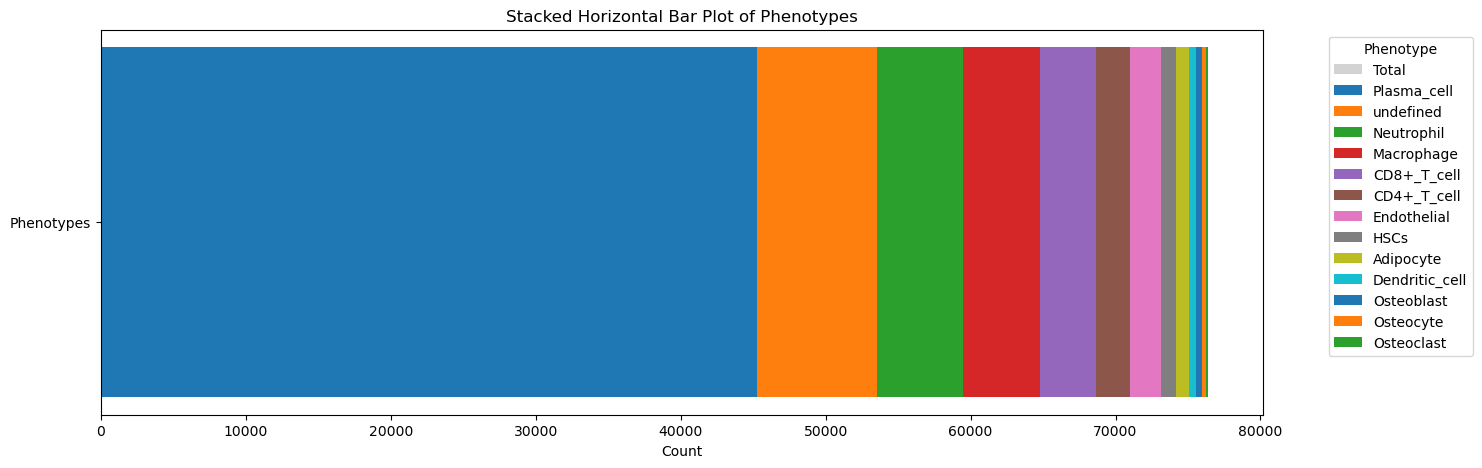

In [15]:
# Plot a stacked bar for the phenotype
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each phenotype
phenotype_counts = dfs[0]['cell_type'].value_counts()

# Create a single stacked horizontal bar plot with slimmer bars
plt.figure(figsize=(15, 5))
plt.barh(['Phenotypes'], [phenotype_counts.sum()], color='lightgray', label='Total', height=0.4)

# Add individual segments for each phenotype
left = 0
for phenotype, count in phenotype_counts.items():
    plt.barh(['Phenotypes'], [count], left=left, label=phenotype, height=0.4)
    left += count

# Add legend and labels
plt.title('Stacked Horizontal Bar Plot of Phenotypes')
plt.xlabel('Count')
plt.legend(title='Phenotype', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

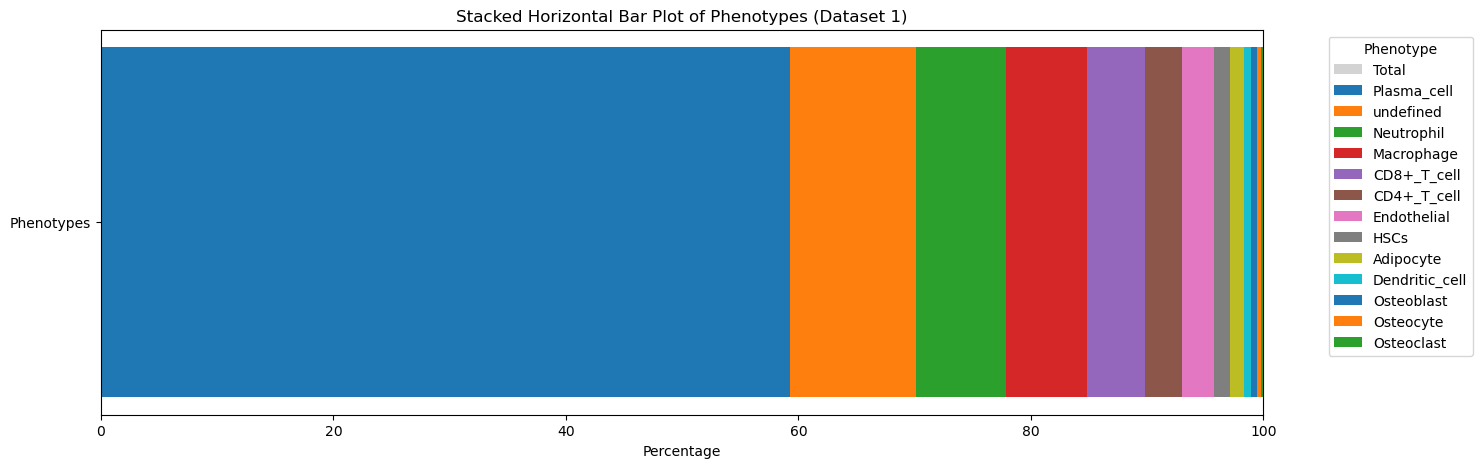

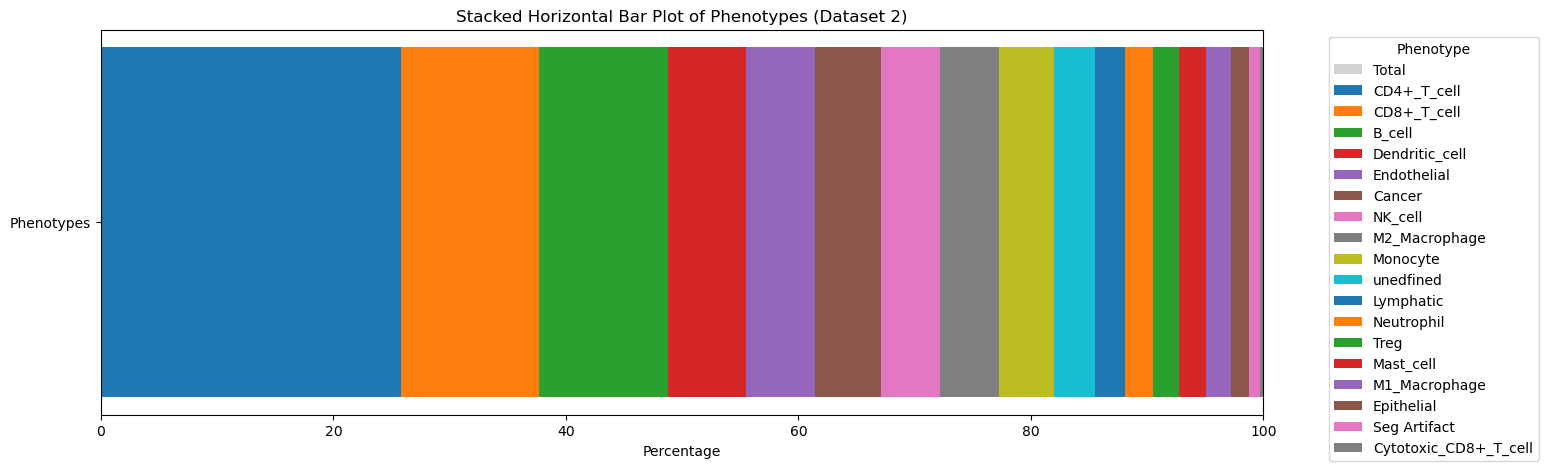

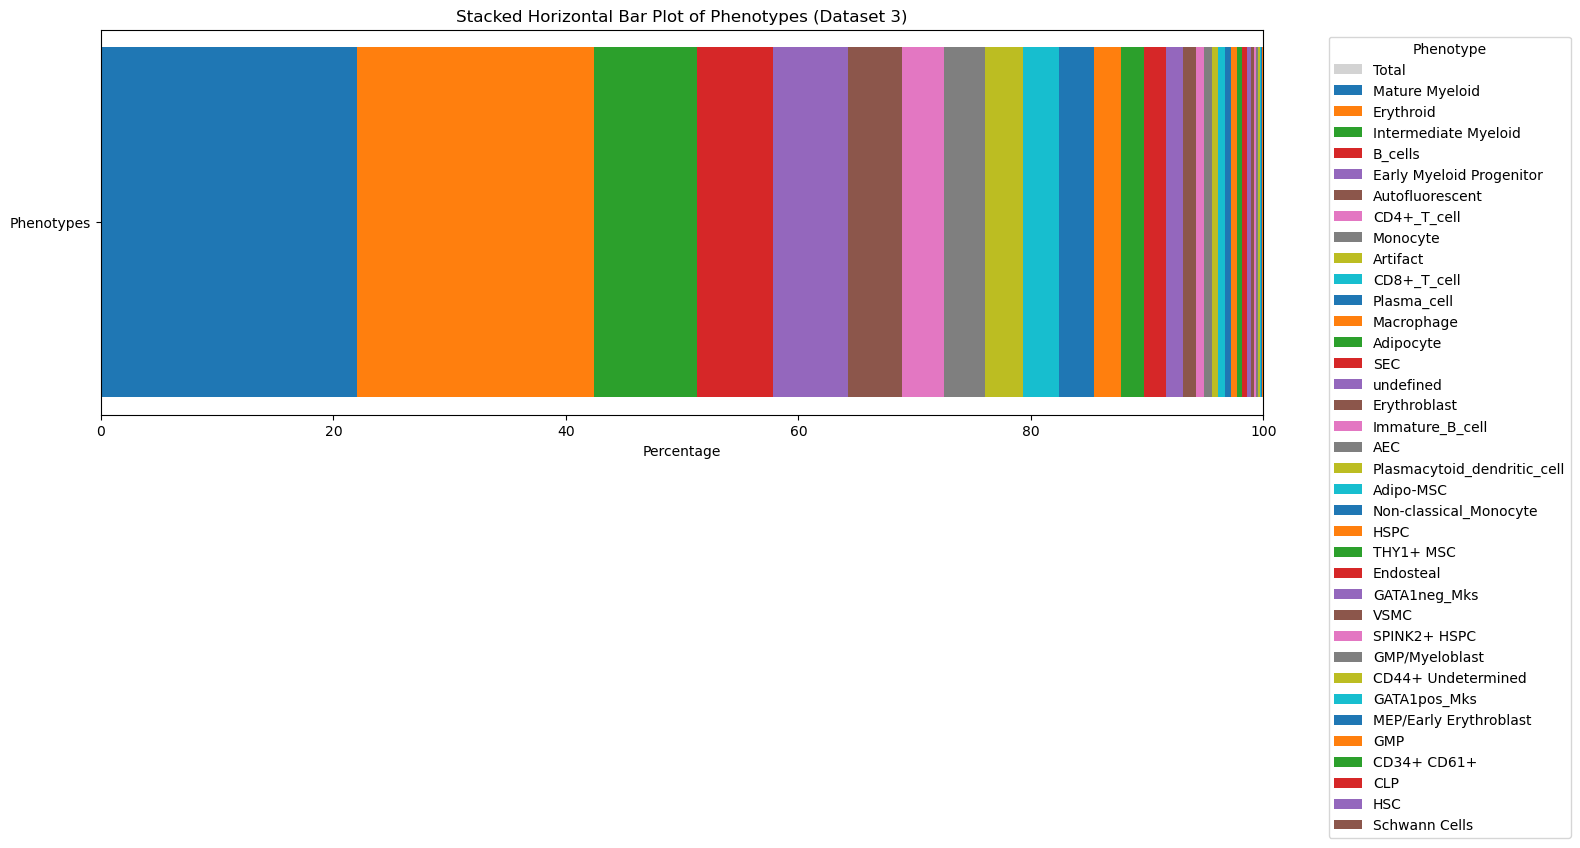

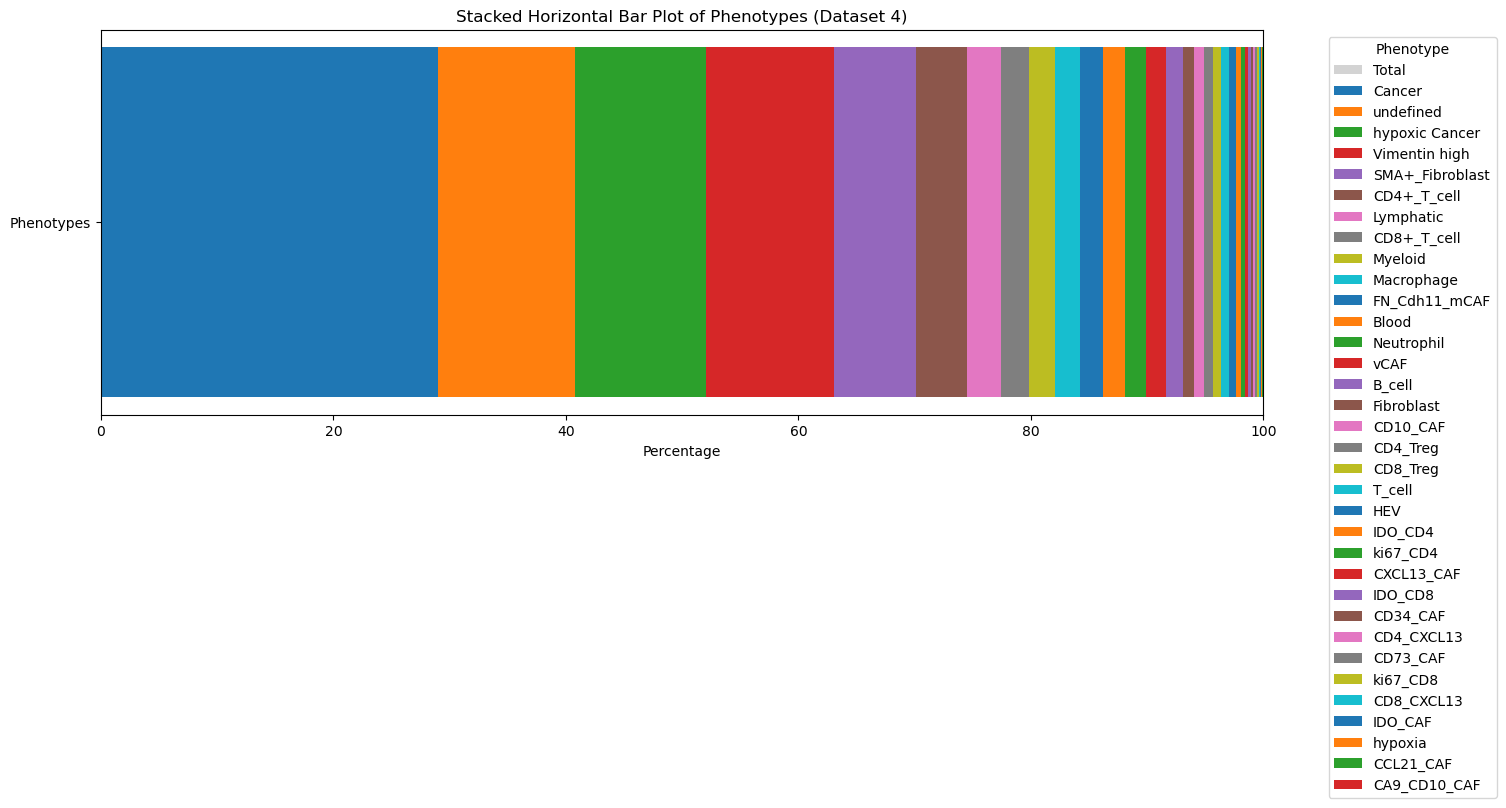

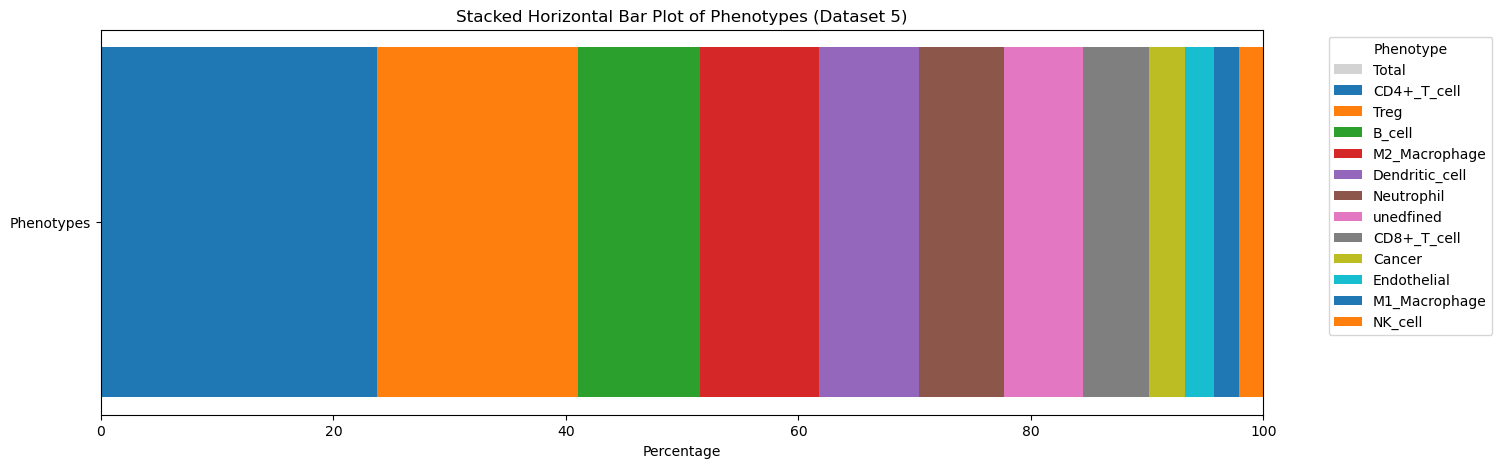

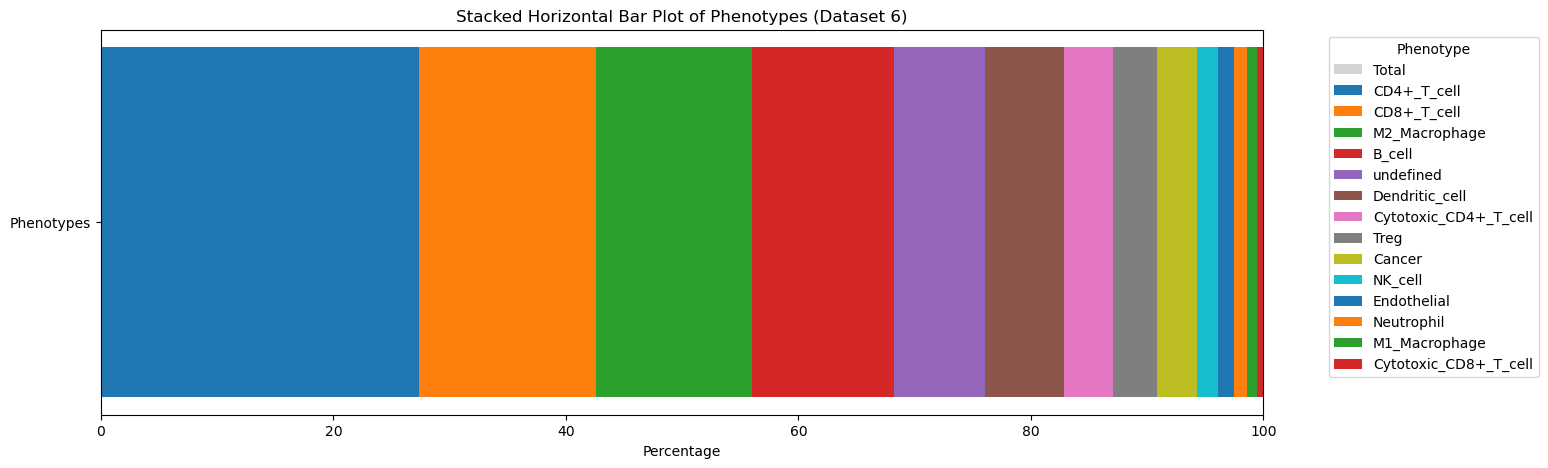

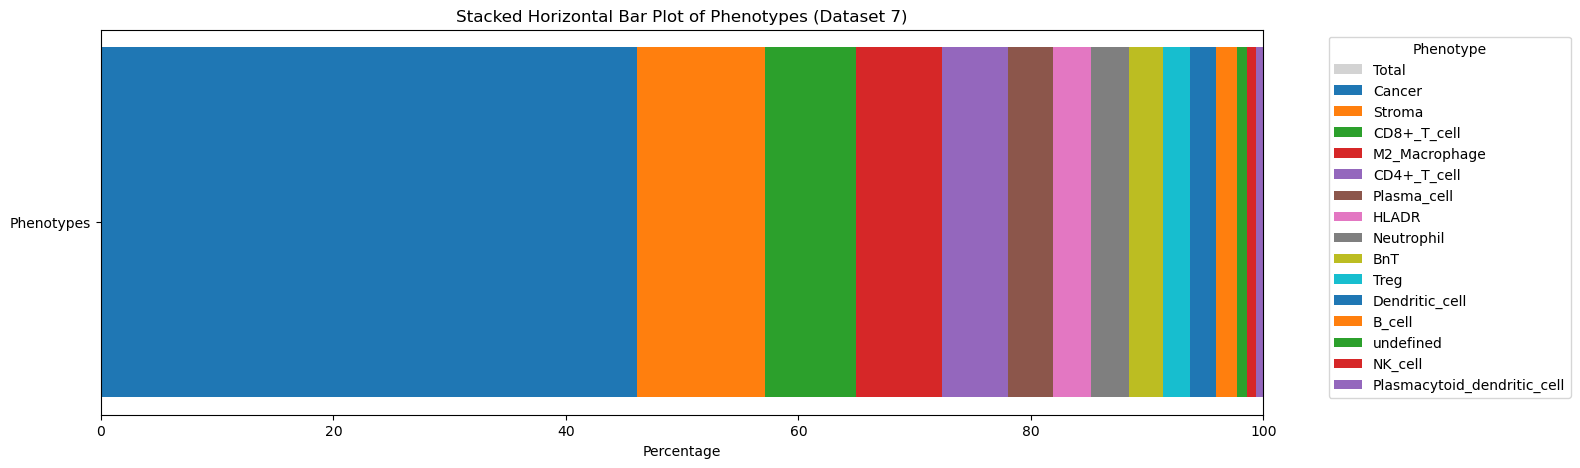

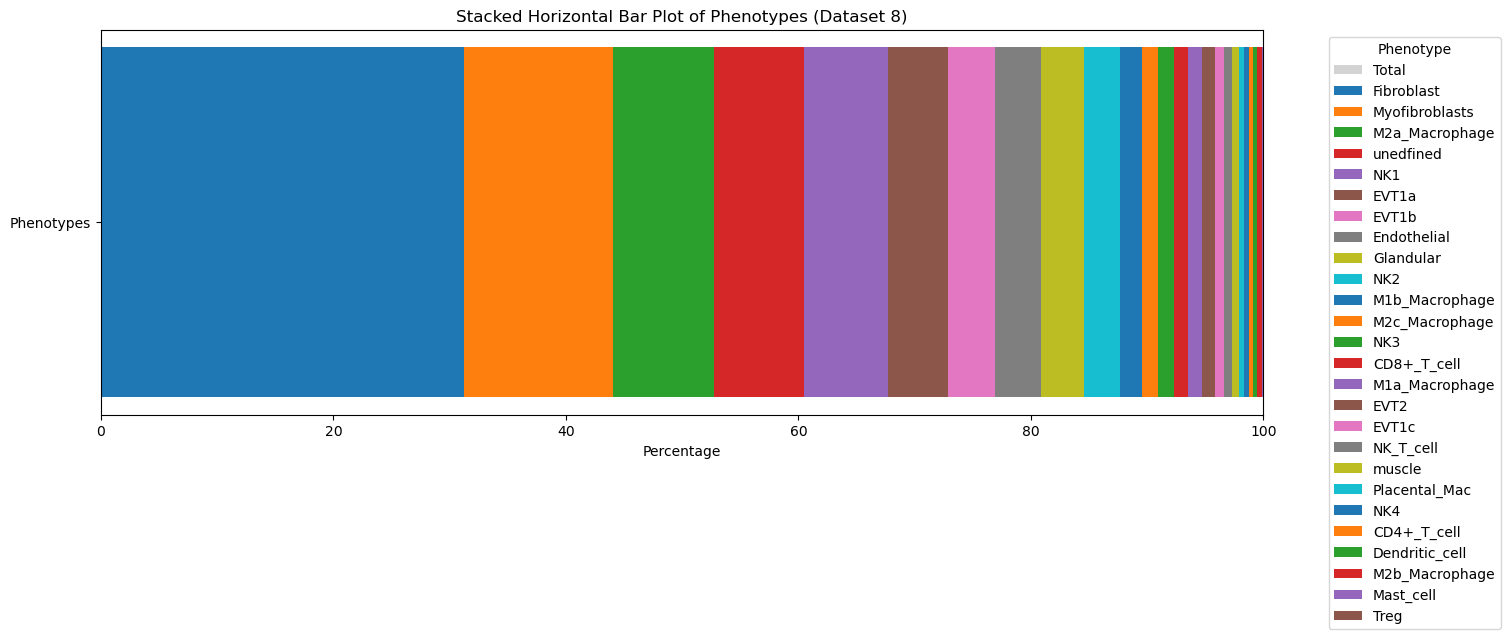

In [30]:
# Determine the maximum percentage across all dataframes for consistent scaling
max_percentage = 100  # Percentages range from 0 to 100

# Set a consistent figure size
fig_width = 15
fig_height = 5

# Loop through each dataframe in dfs and plot the phenotype percentages
for i, df in enumerate(dfs):
    # Count the occurrences of each phenotype
    phenotype_counts = df['cell_type'].value_counts()

    # Calculate percentages
    total_count = phenotype_counts.sum()
    phenotype_percentages = (phenotype_counts / total_count) * 100

    # Create a single stacked horizontal bar plot
    plt.figure(figsize=(fig_width, fig_height))
    plt.barh(['Phenotypes'], [100], color='lightgray', label='Total', height=0.4)

    # Add individual segments for each phenotype
    left = 0
    for phenotype, percentage in phenotype_percentages.items():
        plt.barh(['Phenotypes'], [percentage], left=left, label=phenotype, height=0.4)
        left += percentage

    # Set consistent x-axis limits
    plt.xlim(0, max_percentage)

    # Add legend and labels
    plt.title(f'Stacked Horizontal Bar Plot of Phenotypes (Dataset {i + 1})')
    plt.xlabel('Percentage')
    plt.legend(title='Phenotype', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

## cell types over all datsets

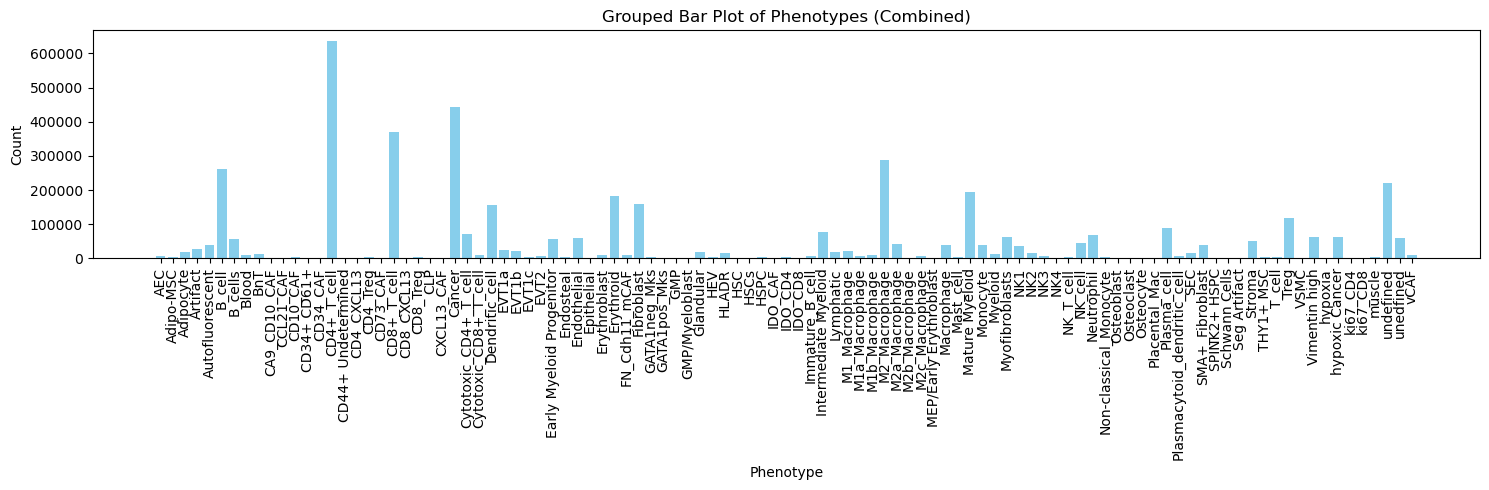

In [21]:
# Combine phenotype counts from all dataframes
combined_counts = pd.Series(dtype=int)

for df in dfs:
    phenotype_counts = df['cell_type'].value_counts()
    combined_counts = combined_counts.add(phenotype_counts, fill_value=0)

# Create a grouped bar plot
plt.figure(figsize=(15, 5))
phenotypes = combined_counts.index
counts = combined_counts.values

# Plot individual bars for each phenotype
plt.bar(phenotypes, counts, color='skyblue')

# Add labels and title
plt.title('Grouped Bar Plot of Phenotypes (Combined)')
plt.xlabel('Phenotype')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

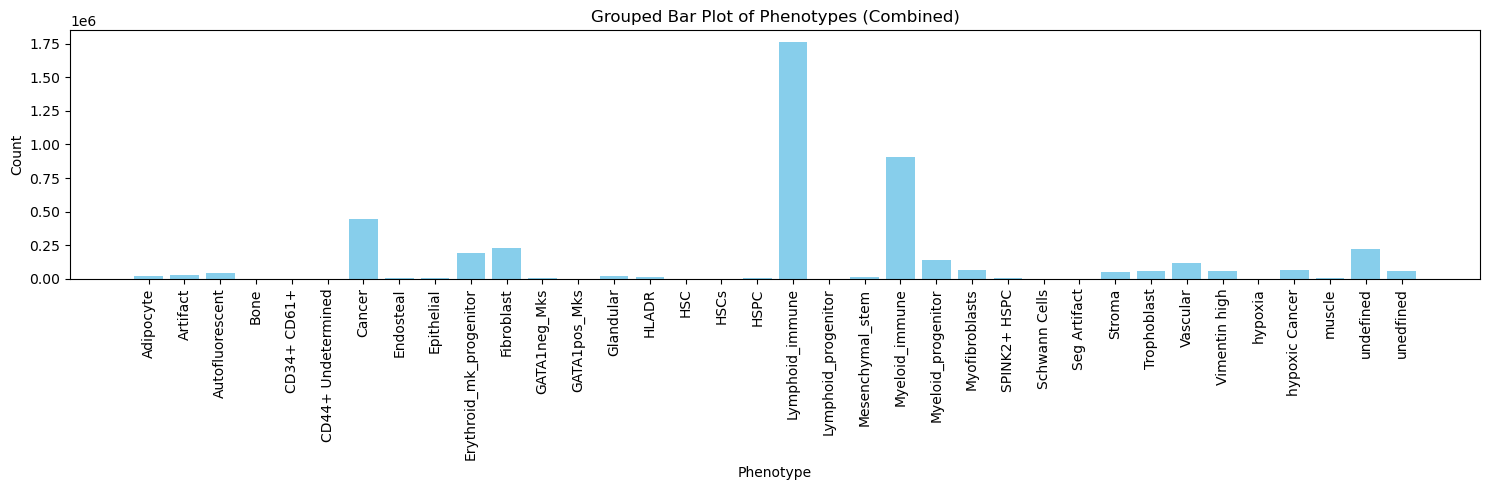

In [23]:
# Combine phenotype counts from all dataframes
combined_counts = pd.Series(dtype=int)

for df in dfs:
    phenotype_counts = df['level_2_cell_type'].value_counts()
    combined_counts = combined_counts.add(phenotype_counts, fill_value=0)

# Create a grouped bar plot
plt.figure(figsize=(15, 5))
phenotypes = combined_counts.index
counts = combined_counts.values

# Plot individual bars for each phenotype
plt.bar(phenotypes, counts, color='skyblue')

# Add labels and title
plt.title('Grouped Bar Plot of Phenotypes (Combined)')
plt.xlabel('Phenotype')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

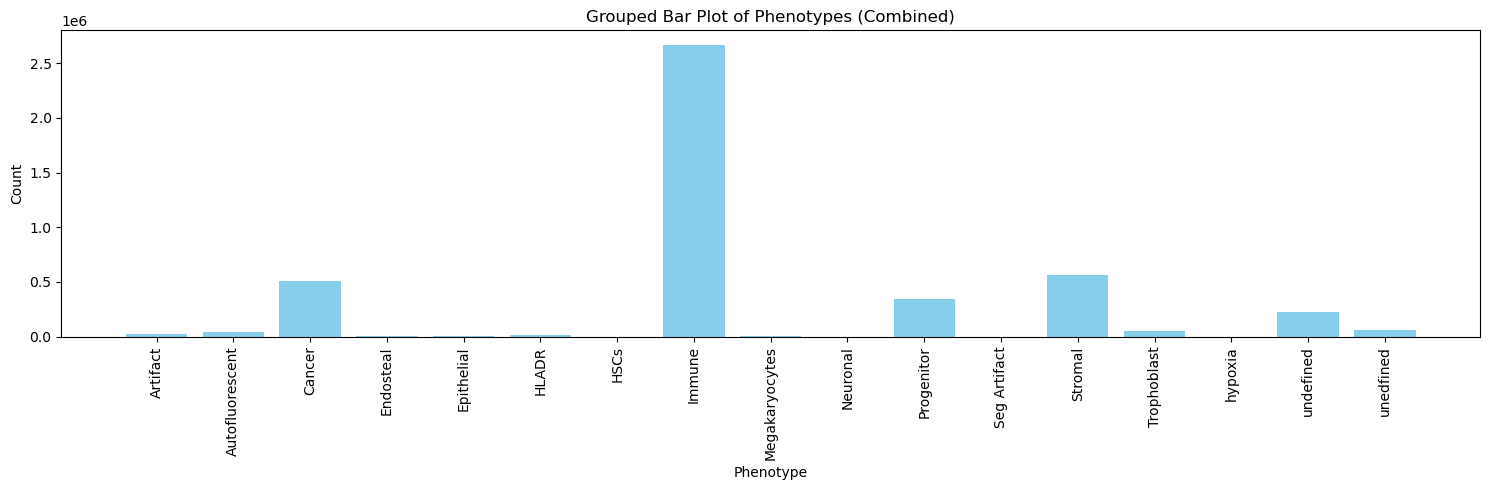

In [24]:
# Combine phenotype counts from all dataframes
combined_counts = pd.Series(dtype=int)

for df in dfs:
    phenotype_counts = df['level_1_cell_type'].value_counts()
    combined_counts = combined_counts.add(phenotype_counts, fill_value=0)

# Create a grouped bar plot
plt.figure(figsize=(15, 5))
phenotypes = combined_counts.index
counts = combined_counts.values

# Plot individual bars for each phenotype
plt.bar(phenotypes, counts, color='skyblue')

# Add labels and title
plt.title('Grouped Bar Plot of Phenotypes (Combined)')
plt.xlabel('Phenotype')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()